In [368]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns

In [369]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
test_values = pd.read_csv('test_values.csv',index_col='building_id')

In [370]:
set_train = train_values.merge(train_labels)
set_train.drop( columns=["building_id"], inplace=True)
set_train = set_train[set_train['count_floors_pre_eq'] <= 6]
set_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


In [371]:
drop_columns = set_train.columns.values[26:38]
set_train.drop(columns= drop_columns, inplace = True)

In [372]:
land_surface_condition = pd.DataFrame()

In [373]:
foundation_type = pd.DataFrame()

In [374]:
land_surface_condition[['n', 'o', 't']]= pd.get_dummies(set_train['land_surface_condition'])
foundation_type[['h', 'i', 'r', 'u', 'w']]= pd.get_dummies(set_train['foundation_type'])

In [375]:
land_surface_condition['n']  = land_surface_condition['n'] * land_surface_condition['n'].mean()
land_surface_condition['o']  = land_surface_condition['o'] * land_surface_condition['o'].mean()
land_surface_condition['t']  = land_surface_condition['t'] * land_surface_condition['t'].mean()

In [376]:
foundation_type['h'] = foundation_type['h'] * foundation_type['h'].mean()
foundation_type['i'] = foundation_type['i'] * foundation_type['i'].mean()
foundation_type['r'] = foundation_type['r'] * foundation_type['r'].mean()
foundation_type['u'] = foundation_type['u'] * foundation_type['u'].mean()
foundation_type['w'] = foundation_type['w'] * foundation_type['w'].mean()

In [377]:
set_train['land_surface_condition'] = land_surface_condition['n'] + land_surface_condition['o'] + land_surface_condition['t']
set_train['foundation_type'] = foundation_type['h'] + foundation_type['i'] + foundation_type['r'] + foundation_type['u'] + foundation_type['w']

set_train['base_condition'] = set_train['land_surface_condition'] + set_train['foundation_type']

<AxesSubplot:>

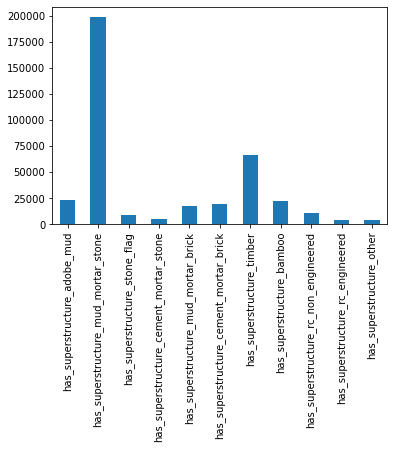

In [378]:
set_train.iloc[:, 14:25].sum().plot.bar()

In [379]:
values = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
vector_names = ['has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered', 'has_superstructure_cement_mortar_brick',
               'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_mud_mortar_stone',
               'has_superstructure_stone_flag', 'has_superstructure_timber', 'has_superstructure_adobe_mud', 
               'has_superstructure_bamboo', 'has_superstructure_other']

In [380]:
for i in range(11):
    set_train.loc[:, [vector_names[i]]] = set_train.loc[:, [vector_names[i]]]*values[i]

In [381]:
set_train['sum_columns'] = 0
for x in range(11):
    set_train['sum_columns'] += set_train[vector_names[x]]

set_train['sum_columns'].head()

0    0.7
1    0.5
2    0.5
3    0.9
4    0.2
Name: sum_columns, dtype: float64

In [382]:
columnas_seleccionadas = ['age',
                         'geo_level_1_id',
                         'area_percentage',
                         'count_floors_pre_eq',
                         'geo_level_2_id',
                         'height_percentage',
                         'sum_columns',
                         'base_condition']
train_values_subset = set_train[columnas_seleccionadas]
train_labels = set_train.loc[:, 'damage_grade']

In [383]:
rf_model = XGBClassifier(objective ='reg:squarederror',  
                colsample_bytree = 0.3, learning_rate = 0.7,
                max_depth = 25, n_estimators = 500, )
#rf_model = RandomForestClassifier(random_state=1, n_estimators=20, max_features=4, max_depth=30)

In [384]:
train_values_subset = pd.get_dummies(train_values_subset)

In [ ]:
rf_model.fit(train_values_subset, train_labels.values.ravel())

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
preds = rf_model.predict(train_values_subset)
f1_score(train_labels, preds, average='micro')

In [ ]:
for i in range(11):
    test_values.loc[:, [vector_names[i]]] = test_values.loc[:, [vector_names[i]]]*values[i]
test_values['sum_columns'] = 0
for x in range(11):
    test_values['sum_columns'] += test_values[vector_names[x]]

In [ ]:
foundation = pd.DataFrame()


land_surface = pd.DataFrame()
land_surface[['n', 'o', 't']]= pd.get_dummies(test_values['land_surface_condition'])
foundation[['h', 'i', 'r', 'u', 'w']]= pd.get_dummies(test_values['foundation_type'])
foundation['h'] = foundation['h'] * foundation['h'].mean()
foundation['i'] = foundation['i'] * foundation['i'].mean()
foundation['r'] = foundation['r'] * foundation['r'].mean()
foundation['u'] = foundation['u'] * foundation['u'].mean()
foundation['w'] = foundation['w'] * foundation['w'].mean()

land_surface['n']  = land_surface['n'] * land_surface['n'].mean()
land_surface['o']  = land_surface['o'] * land_surface['o'].mean()
land_surface['t']  = land_surface['t'] * land_surface['t'].mean()

test_values['base_condition'] = land_surface['n'] + land_surface['o'] + land_surface['t'] + foundation['h'] + foundation['i'] + foundation['r'] + foundation['u'] + foundation['w']

In [ ]:
test_values_subset = test_values[columnas_seleccionadas]
test_values_subset = pd.get_dummies(test_values_subset)

In [ ]:
predictions = rf_model.predict(test_values_subset)

In [ ]:
submission_format = pd.read_csv('submission_format.csv',index_col='building_id')

In [ ]:
my_submission = pd.DataFrame(data=predictions, columns=submission_format.columns,
                            index=submission_format.index)

In [ ]:
my_submission.head()

In [ ]:
my_submission.to_csv('submision.csv')

In [ ]:
!head submision.csv

In [ ]:
# Gini importance
rf_model.feature_importances_

In [ ]:
plt.bar(test_values_subset.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()